# Price elasticity

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
#Import data file
df = pd.read_csv('supermarket.csv')
df

Sales  Price.Eggs  Ad.Type  Price.Cookies
0      18        4.77        0           4.74
1      20        4.67        0           4.81
2      23        4.75        0           4.36
3      23        4.74        0           4.29
4      23        4.63        0           4.17
5      23        4.56        0           4.66
6      24        4.59        0           4.73
7      25        4.75        0           4.11
8      26        4.75        1           4.21
9      26        4.49        0           4.25
10     26        4.41        1           4.62
11     26        4.32        0           4.53
12     27        4.68        0           4.44
13     28        4.66        1           4.19
14     28        4.42        1           4.37
15     29        4.71        0           4.29
16     29        4.66        1           4.57
17     30        4.46        1           4.21
18     30        4.36        1           4.77
19     31        4.47        0           4.00
20     31        4.43        0           4.31
21     33        4.40        1           4.34
22     34        4.61        1           4.05
23     35        4.09        1           4.73
24     38        3.73        0           4.07
25     39        3.89        1           4.75
26     41        4.35        1           4.00
27     44        3.84        1           4.15
28     44        3.81        1           4.34
29     46        3.79        1           4.15

In [3]:
# view shape
df.shape

(30, 4)

In [4]:
#view dtypes
df.dtypes

Sales              int64
Price.Eggs       float64
Ad.Type            int64
Price.Cookies    float64
dtype: object

In [5]:
# list clomns
df.columns

Index(['Sales', 'Price.Eggs', 'Ad.Type', 'Price.Cookies'], dtype='object')

In [6]:
# drop Ad.Type
df = df.drop('Ad.Type', axis = 1 )

<AxesSubplot:>

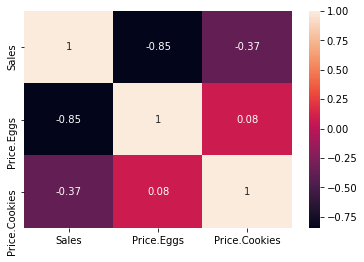

In [7]:
# corr heat map
sns.heatmap(df.corr(), annot = True)

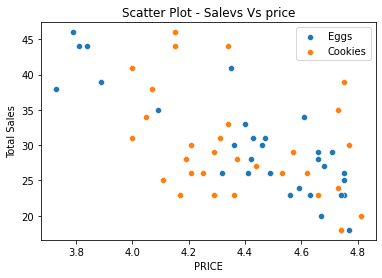

In [8]:
# scatter Plots

sns.scatterplot( x = 'Price.Eggs', y = 'Sales', data = df)
sns.scatterplot(x = 'Price.Cookies', y = "Sales", data = df)
plt.xlabel('PRICE')
plt.legend(labels = ['Eggs', 'Cookies'])
plt.ylabel('Total Sales')
plt.title('Scatter Plot - Salevs Vs price')
plt.show()

## Linear Regression

In [9]:
# define predictors and Target
X = df[['Price.Eggs', 'Price.Cookies']]
y = df.Sales

In [10]:
# define model
model = LinearRegression()

In [11]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45 )

In [12]:
# fit model
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# view coeff
model.coef_

array([-18.1545846 ,  -9.81191721])

In [14]:
# view intercept
model.intercept_

153.1096519651795

In [15]:
# model score
LinearRegression.score(model, X,y)

0.8134109112613949

In [16]:
# predict from x_test
y_pred = model.predict(X_test)
y_pred

array([23.66882611, 42.6765907 , 35.88171115, 24.60121202, 27.39735465,
       29.894919  ])

In [17]:
# error = Y - Y_pred
# calculate mean squared error

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('mean_squared _error is {}' .format(mean_squared_error(y_test, y_pred)))


# calculate root mean squared error

print('root_mean_squared _error is {}' .format(np.sqrt(mean_squared_error(y_test, y_pred))))

# calculate mean absolute error

print('mean_absolute _error is {}' .format(mean_absolute_error(y_test, y_pred)))

mean_squared _error is 9.665667985427007
root_mean_squared _error is 3.108965742079994
mean_absolute _error is 2.6452747341273573
